In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from math import sqrt
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


from google.colab import drive

#Mount google drive
drive.mount('/content/drive', force_remount=True)

#Define File path
df_train= pd.read_csv('/content/drive/MyDrive/ADSA010/Kaggle/BostonLinearRegression/train.csv')
df_test= pd.read_csv('/content/drive/MyDrive/ADSA010/Kaggle/BostonLinearRegression/test.csv')

Mounted at /content/drive


In [ ]:
df_train.describe()

,Unnamed: 0,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,446583.00000,4.465830e+05,446583.000000,446583.000000,446583.000000,446583.000000,446583.000000,446583.000000,446583.000000,446583.000000,...,446583.000000,4.465830e+05,446583.000000,4.465830e+05,446583.000000,4.465830e+05,446583.000000,4.465830e+05,446583.000000,4.465830e+05
mean,223291.00000,1.544047e+09,11.611313,17.794618,11.587004,16.538906,2.188560,1.014986,42.338155,-71.066160,...,0.037358,1.544045e+09,33.454185,1.544042e+09,45.255872,1.544048e+09,29.724526,1.544049e+09,41.990806,1.544049e+09
std,128917.55197,6.894758e+05,6.949633,9.978549,0.492373,9.317592,1.135863,0.095068,0.047843,0.020312,...,0.055200,6.914812e+05,6.465697,6.904573e+05,5.647401,6.904074e+05,7.111014,6.874820e+05,6.938711,6.913610e+05
min,0.00000,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,111645.50000,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.270000,1.000000,42.350300,-71.081000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,223291.00000,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.660000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,334936.50000,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.930000,1.000000,42.364700,-71.054200,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,446582.00000,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [ ]:
df_test.describe()

,Unnamed: 0,timestamp,hour,day,month,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,191393.000000,1.913930e+05,191393.000000,191393.000000,191393.000000,191393.000000,191393.000000,191393.000000,191393.000000,191393.000000,...,191393.000000,1.913930e+05,191393.000000,1.913930e+05,191393.000000,1.913930e+05,191393.000000,1.913930e+05,191393.000000,1.913930e+05
mean,95696.000000,1.544044e+09,11.635363,17.804805,11.585492,2.190897,1.015258,42.338175,-71.066106,39.587261,...,0.037396,1.544042e+09,33.460804,1.544039e+09,45.269449,1.544045e+09,29.739534,1.544046e+09,42.007708,1.544046e+09
std,55250.544373,6.885627e+05,6.946765,9.990346,0.492638,1.134363,0.096242,0.047885,0.020284,6.726436,...,0.055254,6.906304e+05,6.467882,6.896257e+05,5.637440,6.895788e+05,7.107333,6.865431e+05,6.928133,6.905001e+05
min,0.000000,1.543204e+09,0.000000,1.000000,11.000000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,47848.000000,1.543444e+09,6.000000,13.000000,11.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,28.900000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,95696.000000,1.543736e+09,12.000000,17.000000,12.000000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,143544.000000,1.544825e+09,18.000000,28.000000,12.000000,2.930000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.090000,1.544818e+09
max,191392.000000,1.545161e+09,23.000000,30.000000,12.000000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446583 entries, 0 to 446582
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   446583 non-null  int64  
 1   id                           446583 non-null  object 
 2   timestamp                    446583 non-null  float64
 3   hour                         446583 non-null  int64  
 4   day                          446583 non-null  int64  
 5   month                        446583 non-null  int64  
 6   datetime                     446583 non-null  object 
 7   timezone                     446583 non-null  object 
 8   source                       446583 non-null  object 
 9   destination                  446583 non-null  object 
 10  cab_type                     446583 non-null  object 
 11  product_id                   446583 non-null  object 
 12  name                         446583 non-null  object 
 13 

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191393 entries, 0 to 191392
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   191393 non-null  int64  
 1   id                           191393 non-null  object 
 2   timestamp                    191393 non-null  float64
 3   hour                         191393 non-null  int64  
 4   day                          191393 non-null  int64  
 5   month                        191393 non-null  int64  
 6   datetime                     191393 non-null  object 
 7   timezone                     191393 non-null  object 
 8   source                       191393 non-null  object 
 9   destination                  191393 non-null  object 
 10  cab_type                     191393 non-null  object 
 11  product_id                   191393 non-null  object 
 12  name                         191393 non-null  object 
 13 

In [ ]:
df_train.shape

(446583, 58)

In [ ]:
df_test.shape

(191393, 57)

In [ ]:
df_train.columns

Index(['Unnamed: 0', 'id', 'timestamp', 'hour', 'day', 'month', 'datetime',
       'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name',
       'price', 'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'ap

In [ ]:
df_test.columns

Index(['Unnamed: 0', 'id', 'timestamp', 'hour', 'day', 'month', 'datetime',
       'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTem

In [ ]:
unwanted_features=[ 'id', 'timestamp', 'datetime',
       'timezone', 'product_id',
        'latitude', 'longitude', 'temperature','windGust',
       'apparentTemperature','windGustTime', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime']

In [ ]:
df_train_cleaned = df_train.drop(columns=unwanted_features, axis=1)
df_train_cleaned.rename(columns={"Unnamed: 0":"id"},inplace=True)

In [ ]:
df_train_cleaned.head()

,id,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,visibility,icon
0,0,2,29,11,North Station,South Station,Uber,Black,18.0,2.17,1.00,Mostly Cloudy,Mostly cloudy throughout the day.,0.0000,0.00,0.71,8.28,9.981,partly-cloudy-night
1,1,15,27,11,Back Bay,Haymarket Square,Lyft,Lux Black,26.0,2.52,1.00,Overcast,Light rain in the morning.,0.0003,0.15,0.89,10.42,5.011,cloudy
2,2,6,14,12,Financial District,North End,Lyft,Lux,16.5,1.25,1.25,Mostly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.74,1.10,9.716,partly-cloudy-night
3,3,22,26,11,Fenway,North Station,Lyft,Lux,19.5,3.22,1.00,Possible Drizzle,"Rain until morning, starting again in the eve...",0.0031,0.42,0.88,7.02,9.967,rain
4,4,14,28,11,Haymarket Square,Financial District,Uber,WAV,7.0,0.99,1.00,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.00,0.65,6.91,9.908,partly-cloudy-day


In [ ]:
df_test_cleaned = df_test.drop(columns=unwanted_features, axis=1)
df_test_cleaned.rename(columns={"Unnamed: 0":"id"},inplace=True)

In [ ]:
df_test_cleaned.head()

,id,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,visibility,icon
0,0,6,15,12,Financial District,Fenway,Lyft,Shared,4.51,1.0,Overcast,Mostly cloudy throughout the day.,0.0000,0.00,0.92,5.52,9.856,cloudy
1,1,0,17,12,West End,Boston University,Uber,WAV,2.80,1.0,Rain,Rain throughout the day.,0.1044,0.99,0.90,8.29,2.825,rain
2,2,12,3,12,South Station,Theatre District,Lyft,Lyft,1.09,1.0,Overcast,Foggy in the morning.,0.0000,0.00,0.92,3.65,4.767,cloudy
3,3,3,27,11,Financial District,Haymarket Square,Uber,Black,0.92,1.0,Rain,"Rain until morning, starting again in the eve...",0.1088,1.00,0.89,11.14,4.503,rain
4,4,9,29,11,North End,North Station,Lyft,Lux Black,1.12,1.0,Mostly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.67,10.63,10.000,partly-cloudy-night


In [ ]:
df_train_cleaned.isnull().sum()

id                   0
hour                 0
day                  0
month                0
source               0
destination          0
cab_type             0
name                 0
price                0
distance             0
surge_multiplier     0
short_summary        0
long_summary         0
precipIntensity      0
precipProbability    0
humidity             0
windSpeed            0
visibility           0
icon                 0
dtype: int64

In [ ]:
df_test_cleaned.isnull().sum()

id                   0
hour                 0
day                  0
month                0
source               0
destination          0
cab_type             0
name                 0
distance             0
surge_multiplier     0
short_summary        0
long_summary         0
precipIntensity      0
precipProbability    0
humidity             0
windSpeed            0
visibility           0
icon                 0
dtype: int64

In [ ]:
missing_percentage = df_train_cleaned.isnull().sum()*100/len(df_train_cleaned)

In [ ]:
missing_values = pd.DataFrame({'column_name':df_train_cleaned.columns,'missing_values_percentage':missing_percentage,'data_type':df_train_cleaned.dtypes})

In [ ]:
print(missing_values)

                         column_name  missing_values_percentage data_type
id                                id                        0.0     int64
hour                            hour                        0.0     int64
day                              day                        0.0     int64
month                          month                        0.0     int64
source                        source                        0.0    object
destination              destination                        0.0    object
cab_type                    cab_type                        0.0    object
name                            name                        0.0    object
price                          price                        0.0   float64
distance                    distance                        0.0   float64
surge_multiplier    surge_multiplier                        0.0   float64
short_summary          short_summary                        0.0    object
long_summary            long_summary  

In [ ]:
df_train_cleaned.dropna(inplace=True)

In [ ]:
df_test_cleaned.dropna(inplace=True)

In [ ]:
corr_mat = df_train_cleaned.corr()
print(corr_mat)

<ipython-input-22-2fc50ca59488>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df_train_cleaned.corr()


                         id      hour       day     month     price  distance  \
id                 1.000000  0.002057 -0.000256 -0.000646  0.001069 -0.001005   
hour               0.002057  1.000000  0.066799 -0.080547  0.001224  0.005402   
day               -0.000256  0.066799  1.000000 -0.861108 -0.000351 -0.000102   
month             -0.000646 -0.080547 -0.861108  1.000000  0.000106  0.001313   
price              0.001069  0.001224 -0.000351  0.000106  1.000000  0.343920   
distance          -0.001005  0.005402 -0.000102  0.001313  0.343920  1.000000   
surge_multiplier   0.002092 -0.001637  0.001012 -0.000396  0.238948  0.026966   
precipIntensity   -0.002675 -0.232431  0.091055 -0.153511  0.000828 -0.001185   
precipProbability -0.003903 -0.129537  0.030828 -0.097390  0.000412 -0.000147   
humidity          -0.002564 -0.274597 -0.092711 -0.022060 -0.001417 -0.005804   
windSpeed          0.001784  0.072923  0.440811 -0.335017  0.001775  0.002874   
visibility         0.001974 

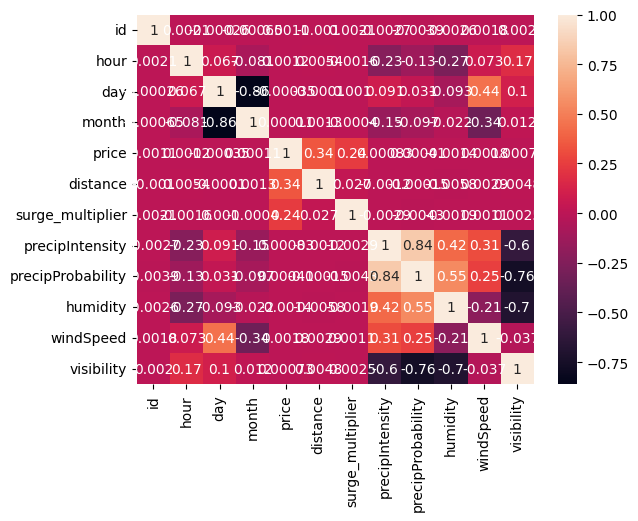

In [ ]:
train_corr = sns.heatmap(corr_mat, annot=True)

In [ ]:
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446583 entries, 0 to 446582
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 446583 non-null  int64  
 1   hour               446583 non-null  int64  
 2   day                446583 non-null  int64  
 3   month              446583 non-null  int64  
 4   source             446583 non-null  object 
 5   destination        446583 non-null  object 
 6   cab_type           446583 non-null  object 
 7   name               446583 non-null  object 
 8   price              446583 non-null  float64
 9   distance           446583 non-null  float64
 10  surge_multiplier   446583 non-null  float64
 11  short_summary      446583 non-null  object 
 12  long_summary       446583 non-null  object 
 13  precipIntensity    446583 non-null  float64
 14  precipProbability  446583 non-null  float64
 15  humidity           446583 non-null  float64
 16  wi

In [ ]:
def encode_onehot(df,features_encode):
    dummies = pd.get_dummies(df[features_encode])
    df=df.drop(columns=features_to_encode,axis=1)
    output=pd.concat([df,dummies*1],axis=1)
    return(output)


In [ ]:
features_to_encode = ['source','destination','cab_type','name','short_summary','long_summary','icon']

In [ ]:
df_train_encoded=encode_onehot(df_train_cleaned,features_to_encode)

In [ ]:
df_train_encoded.shape

(446583, 77)

In [ ]:
df_test_encoded=encode_onehot(df_test_cleaned,features_to_encode)

In [ ]:
df_test_encoded.shape

(191393, 76)

In [ ]:
X = df_train_encoded.loc[:,df_train_encoded.columns!='price']
Y = df_train_encoded[['price']]

print(X.shape,Y.shape)

(446583, 76) (446583, 1)


In [ ]:
test= df_test_encoded.loc[:,:]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.9,shuffle=True)

In [ ]:
std_scaler = StandardScaler()

In [ ]:
X_train.values[:] = std_scaler.fit_transform(X_train)
X_test.values[:] = std_scaler.fit_transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train,Y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(test)

In [ ]:
model.score(X_test,Y_test)

0.9292174174250002

In [ ]:
y_test_pred.dtype

dtype('float64')

In [ ]:
df_final= pd.DataFrame(y_test_pred)


In [ ]:
df_final.rename(columns={"":"Price"},inplace=True)

In [ ]:
df_final[[0]].astype('object')

,0
0,12.553512
1,11.441047
2,6.039478
3,17.252516
4,19.877937
...,...
191388,16.320854
191389,22.78767
191390,18.212787
191391,9.572023


In [ ]:
df_final.dtypes

0    float64
dtype: object

In [ ]:
df1 = df_final.rename(columns={"index":"ID","Unnamed:0":"Price"})

In [ ]:
df_final.shape

(191393, 1)

In [ ]:
Y_test.shape

(44659, 1)

In [ ]:
df_final.reset_index()

,index,0
0,0,12.553512
1,1,11.441047
2,2,6.039478
3,3,17.252516
4,4,19.877937
...,...,...
191388,191388,16.320854
191389,191389,22.787670
191390,191390,18.212787
191391,191391,9.572023


In [ ]:
df_final1= df_final.reset_index()

In [ ]:
df_final1.head()

,index,0
0,0,12.553512
1,1,11.441047
2,2,6.039478
3,3,17.252516
4,4,19.877937


In [ ]:
df_final1.rename(columns = {'index':'ID', '0':'Price'}, inplace = True)

In [ ]:
df_final1.shape

(191393, 2)

In [ ]:
df_final1.to_csv('/content/drive/MyDrive/ADSA010/Kaggle/BostonLinearRegression/AshwinBRBoston_Uber_vs_LyftSubmission2.csv',index=False)